<a href="https://colab.research.google.com/github/nekethamahendran/NLP-project/blob/main/Pandas_join_Function.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Pandas Using  Join Functions**

In [ ]:
import pandas as pd
print(pd.__version__)

1.5.3


In [ ]:
help(pd.merge)

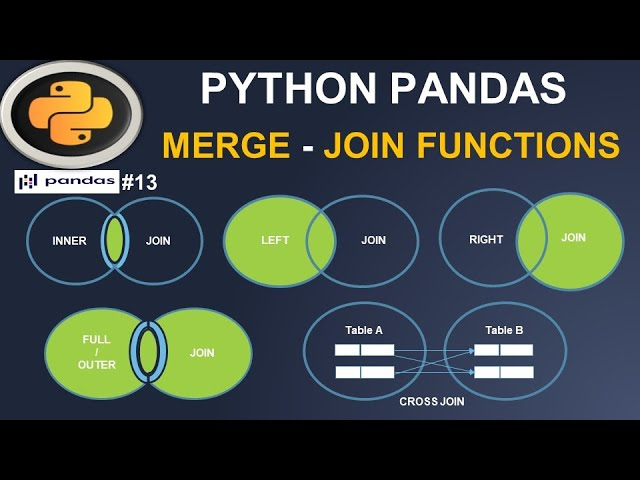

In [ ]:
order=pd.read_excel("/content/Sales Order.xlsx",sheet_name="Orders")
returns=pd.read_excel("/content/Sales Order.xlsx",sheet_name="Returns")
print("The shape of the Orders List",order.shape)
print("The shape of the Returns List",returns.shape)

The shape of the Orders List (5000, 7)
The shape of the Returns List (2000, 5)


In [ ]:
order.head()


,Order ID,Unique ID,Customer,City,Quantity,Price,Total Sale Amount
0,NJ-2016-152156,NJ-2016-TT-107,Raymond Young,Troy,6,12.42,74.52
1,NJ-2016-138688,NJ-2016-PC-944,Helen Dean,Westfield,7,12.42,86.94
2,WA-2015-108966,WA-2015-TQ-107,Shirley Chavez,Seattle,2,16.32,32.64
3,NJ-2014-115812,NJ-2014-ZI-111,Brian Ryan,Westfield,1,12.42,12.42
4,NJ-2017-114412,NJ-2017-JR-537,Benjamin Willis,Westfield,3,17.83,53.49


In [ ]:
returns.head()

,Order ID,Unique ID,Customer,City,State
0,NJ-2016-273214,NJ-ZKDFQ-821902,Raymond Young,Troy,New York
1,NJ-2016-271456,NJ-UTHRK-895117,Helen Dean,Westfield,New Jersey
2,WA-2015-451988,WA-ETBAQ-135442,Shirley Chavez,Seattle,Washington
3,NJ-2014-352961,NJ-EHGXM-601830,Brian Ryan,Westfield,New Jersey
4,NJ-2017-213231,NJ-CJFQS-287500,Benjamin Willis,Westfield,New Jersey


In [ ]:
inner_join=pd.merge(left=order,right=returns,left_on="Order ID",right_on="Order ID")
inner_join.shape #Common record in both data sets

(89, 11)

In [ ]:
inner_join=pd.merge(left=order,right=returns,on="Order ID",how="inner")
inner_join.head()

,Order ID,Unique ID_x,Customer_x,City_x,Quantity,Price,Total Sale Amount,Unique ID_y,Customer_y,City_y,State
0,WA-2016-117590,NJ-TEXWY-11752,Judy Sanchez,Seattle,7,53.35,373.45,NJ-TEXWY-11752,Judy Sanchez,Seattle,Washington
1,WA-2015-117415,NJ-QDWAV-21173,Harold Hunter,Seattle,4,12.42,49.68,NJ-QDWAV-21173,Harold Hunter,Seattle,Washington
2,MA-2017-120999,WA-JJEKO-18817,Lori Shaw,Lowell,7,16.32,114.24,WA-JJEKO-18817,Lori Shaw,Lowell,Massachusetts
3,NJ-2016-101343,NJ-MJQGV-20387,Sandra Hicks,Troy,1,53.35,53.35,NJ-MJQGV-20387,Sandra Hicks,Troy,New York
4,MA-2017-139619,NJ-SDISO-30581,Roger Gomez,Lowell,7,16.32,114.24,NJ-SDISO-30581,Roger Gomez,Lowell,Massachusetts


In [ ]:
inner_join=pd.merge(left=order,right=returns,on="Order ID",how="inner",suffixes=("_OrderT","_ReturnsT"))
inner_join.head()

,Order ID,Unique ID_OrderT,Customer_OrderT,City_OrderT,Quantity,Price,Total Sale Amount,Unique ID_ReturnsT,Customer_ReturnsT,City_ReturnsT,State
0,WA-2016-117590,NJ-TEXWY-11752,Judy Sanchez,Seattle,7,53.35,373.45,NJ-TEXWY-11752,Judy Sanchez,Seattle,Washington
1,WA-2015-117415,NJ-QDWAV-21173,Harold Hunter,Seattle,4,12.42,49.68,NJ-QDWAV-21173,Harold Hunter,Seattle,Washington
2,MA-2017-120999,WA-JJEKO-18817,Lori Shaw,Lowell,7,16.32,114.24,WA-JJEKO-18817,Lori Shaw,Lowell,Massachusetts
3,NJ-2016-101343,NJ-MJQGV-20387,Sandra Hicks,Troy,1,53.35,53.35,NJ-MJQGV-20387,Sandra Hicks,Troy,New York
4,MA-2017-139619,NJ-SDISO-30581,Roger Gomez,Lowell,7,16.32,114.24,NJ-SDISO-30581,Roger Gomez,Lowell,Massachusetts


In [ ]:
order.head(1)

,Order ID,Unique ID,Customer,City,Quantity,Price,Total Sale Amount
0,NJ-2016-152156,NJ-2016-TT-107,Raymond Young,Troy,6,12.42,74.52


In [ ]:
returns.head(1)

,Order ID,Unique ID,Customer,City,State
0,NJ-2016-273214,NJ-ZKDFQ-821902,Raymond Young,Troy,New York


In [ ]:
order["Order ID"].isin(returns["Order ID"]).value_counts()  #matching records in both the data sets

False    4911
True       89
Name: Order ID, dtype: int64

In [ ]:
returns.columns #if we're getting different column in both dataframe as a primary key then we have to define separately left_on,right_on

Index(['Order ID', 'Unique ID', 'Customer', 'City', 'State'], dtype='object')

In [ ]:
returns.rename(columns={"Order ID":"Invoice ID"},inplace=True)
returns.columns

Index(['Invoice ID', 'Unique ID', 'Customer', 'City', 'State'], dtype='object')

In [ ]:
inner_join=pd.merge(order,returns,left_on=["Order ID"],right_on=["Invoice ID"]) #here the primary key is different
inner_join.shape

(89, 12)

In [ ]:
inner_join.head()

,Order ID,Unique ID_x,Customer_x,City_x,Quantity,Price,Total Sale Amount,Invoice ID,Unique ID_y,Customer_y,City_y,State
0,WA-2016-117590,NJ-TEXWY-11752,Judy Sanchez,Seattle,7,53.35,373.45,WA-2016-117590,NJ-TEXWY-11752,Judy Sanchez,Seattle,Washington
1,WA-2015-117415,NJ-QDWAV-21173,Harold Hunter,Seattle,4,12.42,49.68,WA-2015-117415,NJ-QDWAV-21173,Harold Hunter,Seattle,Washington
2,MA-2017-120999,WA-JJEKO-18817,Lori Shaw,Lowell,7,16.32,114.24,MA-2017-120999,WA-JJEKO-18817,Lori Shaw,Lowell,Massachusetts
3,NJ-2016-101343,NJ-MJQGV-20387,Sandra Hicks,Troy,1,53.35,53.35,NJ-2016-101343,NJ-MJQGV-20387,Sandra Hicks,Troy,New York
4,MA-2017-139619,NJ-SDISO-30581,Roger Gomez,Lowell,7,16.32,114.24,MA-2017-139619,NJ-SDISO-30581,Roger Gomez,Lowell,Massachusetts


#Based on Order ID and City performing inner join

In [ ]:
inner_join=pd.merge(order,returns,left_on=["Order ID","City"],right_on= ["Invoice ID","City"],indicator=True)
#To check the status whether it is from left data set or right or from both
inner_join.head()

,Order ID,Unique ID_x,Customer_x,City,Quantity,Price,Total Sale Amount,Invoice ID,Unique ID_y,Customer_y,State,_merge
0,WA-2016-117590,NJ-TEXWY-11752,Judy Sanchez,Seattle,7,53.35,373.45,WA-2016-117590,NJ-TEXWY-11752,Judy Sanchez,Washington,both
1,WA-2015-117415,NJ-QDWAV-21173,Harold Hunter,Seattle,4,12.42,49.68,WA-2015-117415,NJ-QDWAV-21173,Harold Hunter,Washington,both
2,MA-2017-120999,WA-JJEKO-18817,Lori Shaw,Lowell,7,16.32,114.24,MA-2017-120999,WA-JJEKO-18817,Lori Shaw,Massachusetts,both
3,NJ-2016-101343,NJ-MJQGV-20387,Sandra Hicks,Troy,1,53.35,53.35,NJ-2016-101343,NJ-MJQGV-20387,Sandra Hicks,New York,both
4,MA-2017-139619,NJ-SDISO-30581,Roger Gomez,Lowell,7,16.32,114.24,MA-2017-139619,NJ-SDISO-30581,Roger Gomez,Massachusetts,both


In [ ]:
inner_join._merge.value_counts()

both          89
left_only      0
right_only     0
Name: _merge, dtype: int64

#**Left Join**
#All the records from the left side and with common records from the right side

In [ ]:
returns.rename(columns={"Invoice ID":"Order ID"},inplace=True)

In [ ]:
leftjoin=pd.merge(left=order,right=returns,on="Order ID",how="left",indicator=True)
leftjoin.head()

,Order ID,Unique ID_x,Customer_x,City_x,Quantity,Price,Total Sale Amount,Unique ID_y,Customer_y,City_y,State,_merge
0,NJ-2016-152156,NJ-2016-TT-107,Raymond Young,Troy,6,12.42,74.52,NaN,NaN,NaN,NaN,left_only
1,NJ-2016-138688,NJ-2016-PC-944,Helen Dean,Westfield,7,12.42,86.94,NaN,NaN,NaN,NaN,left_only
2,WA-2015-108966,WA-2015-TQ-107,Shirley Chavez,Seattle,2,16.32,32.64,NaN,NaN,NaN,NaN,left_only
3,NJ-2014-115812,NJ-2014-ZI-111,Brian Ryan,Westfield,1,12.42,12.42,NaN,NaN,NaN,NaN,left_only
4,NJ-2017-114412,NJ-2017-JR-537,Benjamin Willis,Westfield,3,17.83,53.49,NaN,NaN,NaN,NaN,left_only


In [ ]:
order.shape

(5000, 7)

In [ ]:
returns.shape

(2000, 5)

In [ ]:
leftjoin.shape #left join count cannot be same as the order count

(5000, 12)

In [ ]:
leftjoin._merge.value_counts()

left_only     4911
both            89
right_only       0
Name: _merge, dtype: int64

# **Right Join**
#All the records from the right side and with common records from the left side

In [ ]:
rightjoin=pd.merge(left=order,right=returns,on="Order ID",how="right",indicator=True)
rightjoin.head()

,Order ID,Unique ID_x,Customer_x,City_x,Quantity,Price,Total Sale Amount,Unique ID_y,Customer_y,City_y,State,_merge
0,NJ-2016-273214,NaN,NaN,NaN,NaN,NaN,NaN,NJ-ZKDFQ-821902,Raymond Young,Troy,New York,right_only
1,NJ-2016-271456,NaN,NaN,NaN,NaN,NaN,NaN,NJ-UTHRK-895117,Helen Dean,Westfield,New Jersey,right_only
2,WA-2015-451988,NaN,NaN,NaN,NaN,NaN,NaN,WA-ETBAQ-135442,Shirley Chavez,Seattle,Washington,right_only
3,NJ-2014-352961,NaN,NaN,NaN,NaN,NaN,NaN,NJ-EHGXM-601830,Brian Ryan,Westfield,New Jersey,right_only
4,NJ-2017-213231,NaN,NaN,NaN,NaN,NaN,NaN,NJ-CJFQS-287500,Benjamin Willis,Westfield,New Jersey,right_only


In [ ]:
order.shape

(5000, 7)

In [ ]:
returns.shape

(2000, 5)

In [ ]:
rightjoin.shape

(2000, 12)

In [ ]:
rightjoin._merge.value_counts()

right_only    1911
both            89
left_only        0
Name: _merge, dtype: int64

# **Full Join**

In [ ]:
fulljoin=pd.merge(order,returns,on="Order ID",how="outer",indicator=True)
print("The shape of the Orders List",order.shape)
print("The shape of the Returns List",returns.shape)

The shape of the Orders List (5000, 7)
The shape of the Returns List (2000, 5)


In [ ]:
fulljoin.shape

(6911, 12)

In [ ]:
fulljoin._merge.value_counts()

left_only     4911
right_only    1911
both            89
Name: _merge, dtype: int64

In [ ]:
fulljoin[fulljoin._merge.isin(["right_only","both"])].shape

(2000, 12)

In [ ]:
fulljoin[fulljoin._merge.isin(["left_only","both"])].shape

(5000, 12)

In [ ]:
fulljoin[fulljoin._merge.isin(["both"])].shape #both=inner join

(89, 12)

#**Cross Join**
#What does cross join do?
 This can be used for all the combination of each row from the two tables.

In [ ]:
crossjoin=pd.merge(order[:5],returns[:5],how="cross",indicator=True)
crossjoin.shape

(25, 13)

In [ ]:
crossjoin._merge.value_counts()

both          25
left_only      0
right_only     0
Name: _merge, dtype: int64

In [ ]:
df1=pd.DataFrame({"left":["A","B"]})
df2=pd.DataFrame({"right":[5,8]})

In [ ]:
df1

,left
0,A
1,B


In [ ]:
df2

,right
0,5
1,8


In [ ]:
pd.merge(df1,df2,how="cross")

,left,right
0,A,5
1,A,8
2,B,5
3,B,8
